In [1]:
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
rng = np.random.default_rng() 

In [2]:
#Load chains
idata = az.from_netcdf('../data/SF_continuity_Bspline.nc')

#get the design matrix from the Bspline model and associated redshifts
z_ax = idata.attrs['z_plot']
dmat = idata.attrs['dmat_plot']

# Get chains for the spline coefficients for the parameter 'b', the size-mass intercept
b_coeff_chains = idata.posterior['b_val'].values.reshape(12000,12)
b_coeff = rng.choice(b_coeff_chains,size=  500, axis = 0) # Select 500

# Same thiing for m, the size-mass slope
m_coeff_chains = idata.posterior['m_val'].values.reshape(12000,12)
m_coeff = rng.choice(m_coeff_chains,size=  500, axis = 0)

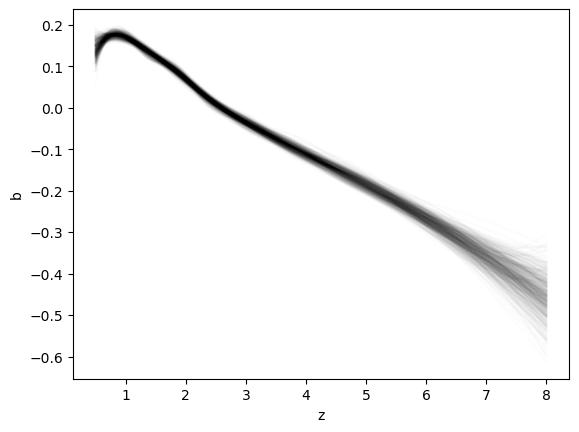

In [3]:
#Plot b and m as a function of redshift

#Use design matrix to calculate value of b based on the spline coefficients.
b_at_z = np.dot(dmat,b_coeff.T)
m_at_z = np.dot(dmat, m_coeff.T)

#Showing a series of draws from the posterior
plt.plot(z_ax,b_at_z, 'k-', alpha = 0.01)
plt.xlabel('z')
plt.ylabel('b')
plt.show()

Text(0.5, 0, 'b at z=2')

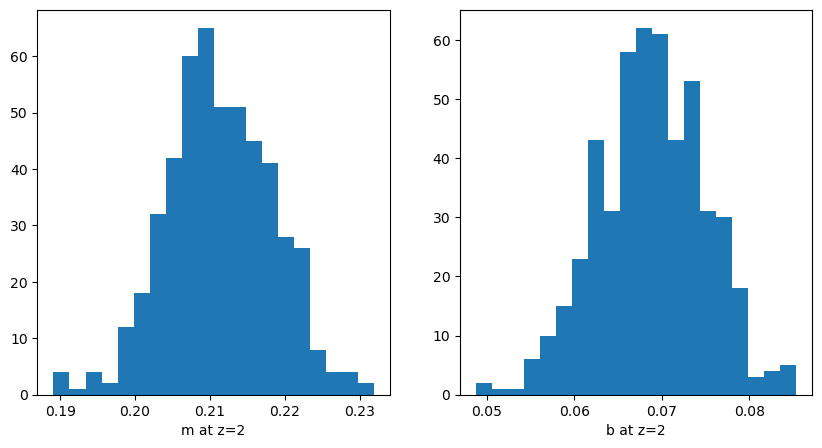

In [4]:
#Define redshift interpolation function for both parameters
b_interp = interp1d(z_ax, b_at_z, axis = 0)
m_interp = interp1d(z_ax, m_at_z, axis = 0)

# Interpolate to z=2 for each draw of posterior
m_at_2 = m_interp(2)
b_at_2 = b_interp(2)

#Show distributions of each parameter
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,5))
ax1.hist(m_at_2, bins = 20)
ax1.set_xlabel('m at z=2')
ax2.hist(b_at_2, bins = 20)
ax2.set_xlabel('b at z=2')